**chapter3 预处理与无监督学习**
- @date: 2024-07-14

In [1]:
import mglearn

---
# 无监督学习的概念
- 无监督学习: 训练集不含已知输出的机器学习算法
- 无监督学习包括: 变换和聚类
- 无监督变换(unsupervised transformation): 创建数据新的表示的算法, 常用应用为降维 
- 聚类算法(clustering algorithm): 将数据划分成不同的组, 每组包含相似的物项
- 评估无监督学习的唯一方法是人工检查

---
# 预处理(特征缩放)
- 一些算法(例如神经网络和SVM)对特征分布非常敏感
- 特征缩放可以看成无监督算法, 通过特征缩放创建了数据的新的表示, 可以提高监督学习的精度
- 注意: 不同的特征缩放算法应当作用在训练集上, 得到的scaler再作用在测试集上

## 4种数据缩放方法
1. StandardScaler: 
    * 使每个特征的平均值为0, 方差为1, 特征都在一个数量级上
    * 不保证每个特征都有特定的最大值和最小值
2. RobustScaler:
    * 类似StandardScale, 但是使用的是中位数和四分位数
    * 这样会减少异常值的影响
3. MinMaxScaler:
    * 使每个特征都在0-1范围内
4. Normalizer:
    * 不同于对特征操作, 其对数据点操作, 使每个数据点在特征空间的欧式长度为1

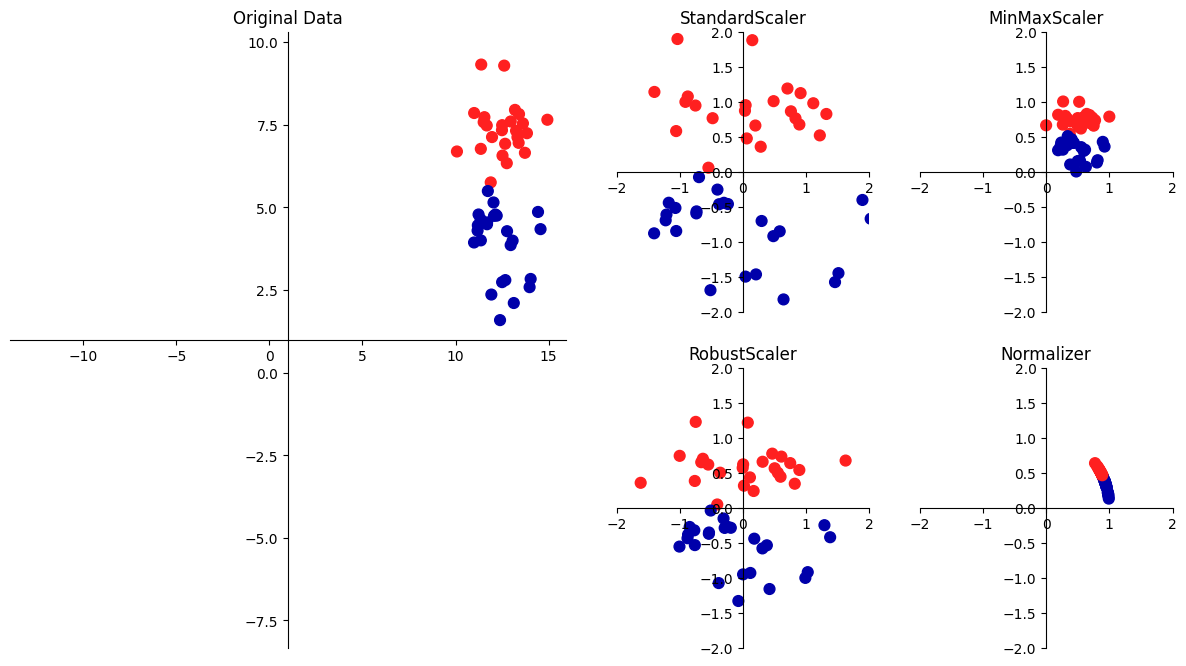

In [2]:
mglearn.plots.plot_scaling()

## cancer数据集实战

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 划分数据集
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# 数据缩放
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # 使用训练集的均值和方差来缩放数据

# 对训练集和测试集进行缩放
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC
# 无数据缩放的SVM
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("无数据缩放的SVM测试集得分: {:.2f}".format(svm.score(X_test, y_test)))

# 有数据缩放的SVM
svm.fit(X_train_scaled, y_train)
print("有数据缩放的SVM测试集得分: {:.2f}".format(svm.score(X_test_scaled, y_test)))

无数据缩放的SVM测试集得分: 0.94
有数据缩放的SVM测试集得分: 0.97


---
# 降维

## 主成分分析(PCA)